# Kaggle Facial Keypoints Detection with Keras

This is a replica of [This blog in Japanese](https://elix-tech.github.io/ja/2016/06/02/kaggle-facial-keypoints-ja.html), many thanks to [Shinya Yuki](https://twitter.com/tuntuku_sy)


[The original Daniel Nouri's implementation](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/) was built on [Lasagne](https://github.com/benanne/Lasagne), a library for the obsolete deep learning framework [Theano](http://deeplearning.net/software/theano/).


[Kaggle](https://www.kaggle.com) holds facial keypoints detection competition and all you need is [here](https://www.kaggle.com/c/facial-keypoints-detection/data)

dataset  | num   | resolution | color     | keypoints
---      | ---   | ---        | ---       | ---
Training | 7049  | 96x96      | grayscale | 15

## Model 1 - single hidden layer

### Intro

A simple NN with only one hidden layer consumes less CPU time

Both image pixels and keypoints are in CSV files, and pixels are stored in 'Image' column and separated by space. The function load both the traning and the test data, and the differece of which is that the test data doesn't contain the target values.

1. After dropna() leaves 2140 samples only, which may cause overfitting because input-dimension(96x96=9216) is much more than the prior
1. Normalise (X,y) to [-1,1] may help reduce unexpected error

### Model structure

In [35]:
# 
import utils, importlib
importlib.reload(utils)

trainlib = 'training.csv'
testlib  = 'test.csv'

(X, y) = utils.loadset(trainlib)

print()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [8]:
# 1-hidden-layer NN
import utils, importlib
importlib.reload(utils)

model = utils.modellib(name='single')
model.summary()

hist = model.fit(X, y, epochs=100, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               921700    
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________
Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s 457us/step - loss: 0.0614 - val_loss: 0.0139
Epoch 2/100
1712/1712 [==============================] - 1s 325us/step - loss: 0.0110 - val_loss: 0.0100
Epoch 3/100
1712/1712 [==============================] - 1s 297us/step - loss: 0.0097 - val_loss: 0.0091
Epoch 4/100
1712/1712 [===============

Epoch 71/100
1712/1712 [==============================] - 1s 318us/step - loss: 0.0032 - val_loss: 0.0041
Epoch 72/100
1712/1712 [==============================] - 1s 297us/step - loss: 0.0031 - val_loss: 0.0041
Epoch 73/100
1712/1712 [==============================] - 1s 292us/step - loss: 0.0031 - val_loss: 0.0040
Epoch 74/100
1712/1712 [==============================] - 1s 304us/step - loss: 0.0031 - val_loss: 0.0040
Epoch 75/100
1712/1712 [==============================] - 1s 294us/step - loss: 0.0031 - val_loss: 0.0042
Epoch 76/100
1712/1712 [==============================] - 0s 288us/step - loss: 0.0031 - val_loss: 0.0041
Epoch 77/100
1712/1712 [==============================] - 1s 315us/step - loss: 0.0030 - val_loss: 0.0039
Epoch 78/100
1712/1712 [==============================] - 1s 298us/step - loss: 0.0030 - val_loss: 0.0039
Epoch 79/100
1712/1712 [==============================] - 1s 314us/step - loss: 0.0030 - val_loss: 0.0039
Epoch 80/100
1712/1712 [======================

### Visualize loss

Use 'history' attribute of the model，and plot acc/loss tab

img/single-layer-test.png saved.


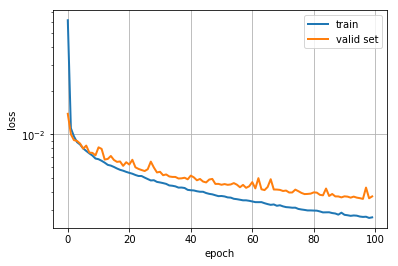

In [36]:
# Visualise
% matplotlib inline
import utils, importlib
importlib.reload(utils)

utils.histplot(hist, save='img/single-layer-test.png', show=True)

### Prediction

In [38]:
# prediction
import utils, importlib
importlib.reload(utils)

trainlib = 'training.csv'
testlib  = 'test.csv'

xtest, _ = utils.loadsets(testlib, test=True)
ypred    = model.predict(xtest)

ImageId    1783
Image      1783
dtype: int64


image 918 to 934
img/pred-single.png saved.


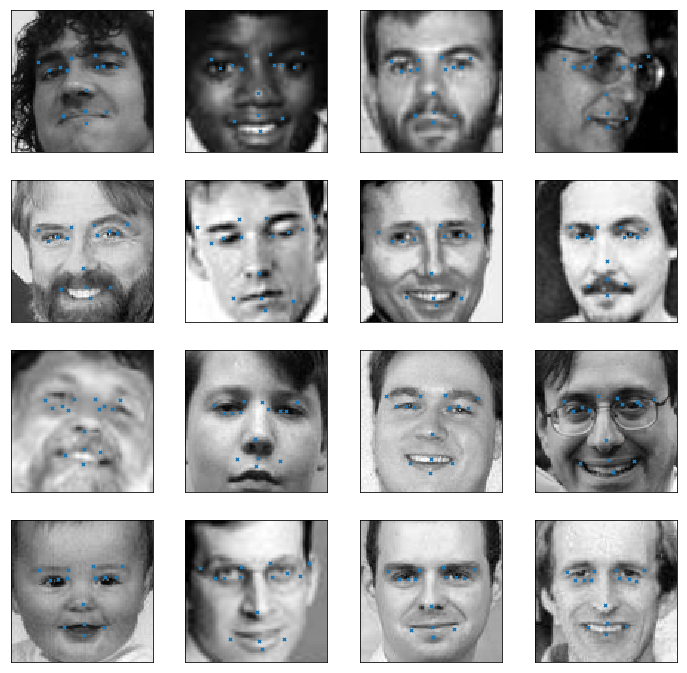

In [117]:
# show
import utils, importlib
importlib.reload(utils)

utils.predplot(xtest, ypred, save='img/pred-single.png', show=True)

### Save and load models

In [67]:
# save model
import utils, importlib
importlib.reload(utils)

# utils.savemodel(model, name='model/single_hidden_layer')

# load model
frame   = 'model/single_hidden_layer_architecture.json'
weights = 'model/single_hidden_layer_weights.h5'

# model = utils.loadmodel(frame, weights, toprint=True)

Structure from: model/single_hidden_layer_architecture.json
Weights from: model/single_hidden_layer_weights.h5


## Model 2 - CNN


### Intro

Ingrediants：convolutional layers，pooling layers，dense(fully connected) layers

1. Convolutional layers: learning weights
![Conv feature][in1]

2. Pooling layers：max or average pooling, reduce complexity
![MaxPooling][in2]

3. Dense(fully connected) layers：connected to all nodes in the last layer, only 1 dimension arrays accepted.

[in1]: img/intro-conv.gif
[in2]: img/intro-maxpool.jpg

### Model structure

In [50]:
# convert input-dim to (96,96,1)
import utils, importlib
importlib.reload(utils)

trainlib = 'training.csv'
testlib  = 'test.csv'

(X, y) = utils.loadset2d(trainlib)

print()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [105]:
# Model 2: CNN
import utils, importlib
importlib.reload(utils)

modelCNN = utils.modellib(name='CNN', dim=(96, 96, 1))
modelCNN.summary()

histCNN = modelCNN.fit(X, y, epochs=100, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        8256      
_________________________________________________________________
activation_12 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       32896     
__________

1712/1712 [==============================] - 18s 10ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 57/100
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 58/100
1712/1712 [==============================] - 18s 10ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 59/100
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 60/100
1712/1712 [==============================] - 18s 10ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 61/100
1712/1712 [==============================] - 18s 11ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 62/100
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 63/100
1712/1712 [==============================] - 18s 10ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 64/100
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 65/100
1712/1712 [==============================] - 1

### Visualize loss

img/CNN-test.png saved.


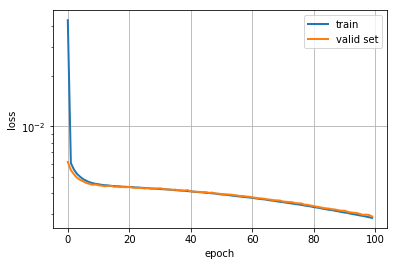

In [106]:
# Visualise
% matplotlib inline
import utils, importlib
importlib.reload(utils)

utils.histplot(histCNN, save='img/CNN-test.png', show=True)

### Prediction

In [107]:
# prediction
import utils, importlib
importlib.reload(utils)

trainlib = 'training.csv'
testlib  = 'test.csv'

xtest, _ = utils.loadset2d(testlib, test=True)
ypred = modelCNN.predict(xtest)

ImageId    1783
Image      1783
dtype: int64


image 926 to 942
img/pred-CNN.png saved.


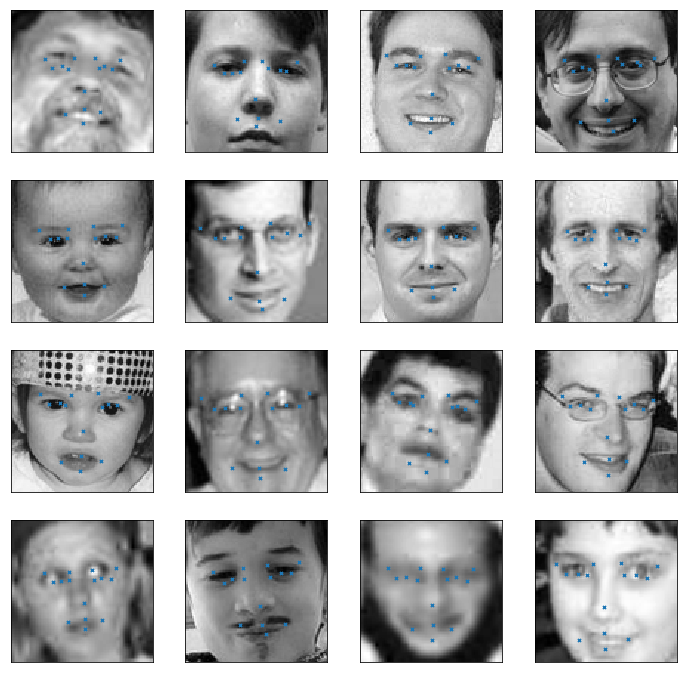

In [118]:
# show
import utils, importlib
importlib.reload(utils)

utils.predplot(xtest, ypred, save='img/pred-CNN.png', show=True)

### Save and load models

In [112]:
# save model
import utils, importlib
importlib.reload(utils)

# utils.savemodel(modelCNN, name='model/CNN')

# load model
frame   = 'model/CNN_architecture.json'
weights = 'model/CNN_weights.h5'

# modelCNN = utils.loadmodel(frame, weights, toprint=True)

Structure: model/CNN_architecture.json
Weights: model/CNN_weights.h5


## Compare models

In [113]:
# generate preds
import utils, importlib
importlib.reload(utils)

trainlib = 'training.csv'
testlib  = 'test.csv'

xtest,    _= utils.loadset(testlib, test=True)
xtest2d, _ = utils.loadset2d(testlib, test=True)
ypred      = model.predict(xtest)
ypredCNN   = modelCNN.predict(xtest2d)

ImageId    1783
Image      1783
dtype: int64
ImageId    1783
Image      1783
dtype: int64


img/hist-compare.png saved.


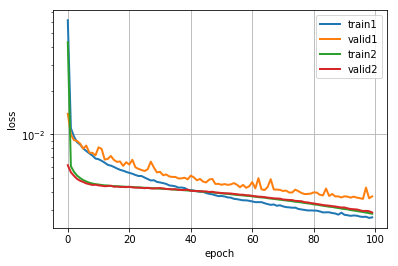

In [115]:
# Compare loss
% matplotlib inline
import utils, importlib
importlib.reload(utils)

utils.histplotdiff(hist, histCNN, save='img/hist-compare.png', show=True)

image 197 to 201
img/pred-compare.png saved.


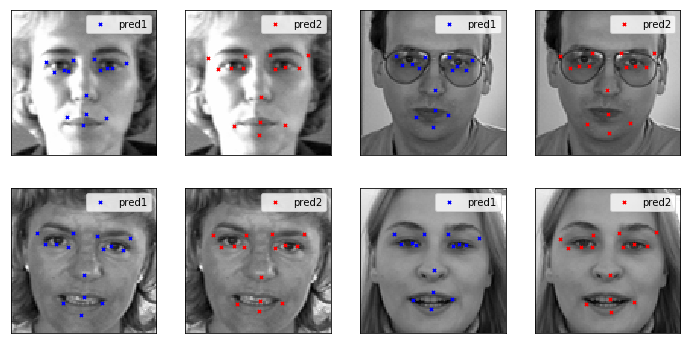

In [126]:
# Compare prediction
import utils, importlib
importlib.reload(utils)

utils.predplotdiff(xtest, ypred, ypredCNN, save='img/pred-compare.png', show=True)